In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset

df = pd.merge(ride, city, on =['city', 'city'])

df = df.drop_duplicates("city")

df.reset_index(inplace=True)
del df["index"]
# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
avg_city=df.groupby(["city"]).mean()["fare"]

In [49]:
total_count=df.groupby(["city"]).count()["fare"]

In [50]:
driver_city=city.groupby(["city"]).mean()["driver_count"]

In [51]:
chart_data={"Average Fare Per City ($)": avg_city,
            "Total Rides (Per City)": total_count,
            "Total Drivers (Per City)": driver_city
            }
chart_df=pd.DataFrame(chart_data)

In [48]:
df_final = pd.merge(city, chart_df, how="left", on=["city", "city"])


urbans = df_final.loc[df_final["type"] == "Urban"]
suburbans = df_final.loc[df_final["type"] == "Suburban"]
rurals = df_final.loc[df_final["type"] == "Rural"]

KeyError: 'city'

In [46]:
x_axis1 = urbans["Total Rides (Per City)"]
y_axis1 = urbans["Average Fare Per City ($)"]
size1 = urbans["Total Drivers (Per City)"]
labels1 = "Urban"


x_axis2 = suburbans["Total Rides (Per City)"]
y_axis2 = suburbans["Average Fare Per City ($)"]
size2 = suburbans["Total Drivers (Per City)"]
labels2 = "Suburban"


x_axis3 = rurals["Total Rides (Per City)"]
y_axis3 = rurals["Average Fare Per City ($)"]
size3 = rurals["Total Drivers (Per City)"]
labels3 = "Rural"


NameError: name 'urbans' is not defined

In [32]:
# plt.scatter(x_axis2, y_axis2,  color="yellow", alpha=0.5, s=size2*6, edgecolor="black", label="Rural")
# plt.scatter(x_axis3, y_axis3, linewidth=0, marker="o", color="orange", alpha=0.5, s=size3*6, edgecolor="black", label="Suburban")
# plt.scatter(x_axis1, y_axis1, linewidth=0, marker="o", color="blue", alpha=0.5, s=size1*6, edgecolor="black", label="Urban")
# plt.xlim(1.2, 41)
# plt.ylim(5, 45)
# plt.xlabel("Total Rides (Per City)")
# plt.ylabel("Average Fare Per City ($)")
# plt.title("Pyber Rider Sharing Data (2016)", fontsize=16, fontweight="bold")
# plt.legend()
# plt.grid()
# plt.savefig("PyberGraph.png")
# plt.show()

## Bubble Plot of Ride Sharing Data

In [33]:
# Obtain the x and y coordinates for each of the three city types



#city_urban = df_final["Total Rides (Per city)"]
# city_suburban = suburban.groupby(['city'])
# city_rural = rural.groupby(['city'])

# ridecount_urban = urban['city'].value_counts().sort_index()
# ridecount_rural = rural['city'].value_counts().sort_index()
# ridecount_suburban = suburban['city'].value_counts().sort_index()


# driver_urban = city_urban['driver_count'].mean()
# # driver_suburban = city_suburban['driver_count'].mean()
# # driver_rural = city_rural['driver_count'].mean()

# # fare_urban = city_urban['fare'].sum() / ridecount_urban
# # fare_suburban = city_suburban['fare'].sum() / ridecount_suburban
# # fare_rural = city_rural['fare'].sum() / ridecount_rural

# # # Build the scatter plots for each city types
# legend_1 = plt.scatter(urban, suburban, facecolors="darkorange", edgecolor="black", s=driver_urban*6)
# legend_2 = plt.scatter(suburban,urban, facecolors="blue", edgecolors="black", s=driver_suburban*6)
# legend_3 = plt.scatter(ridecount_rural, fare_rural, facecolors="yellow",edgecolors="black", s=driver_rural*6)
# # # # Incorporate the other graph properties
# # plt.title("Pyber Ride Sharing Data 2016")
# # plt.xlabel("Total Number of Rides(Per City)")
# plt.ylabel("Average Fare($)")
# plt.grid()
# # Create a legend
# plt.legend((legend_1, legend_2, legend_3), ('Urban', 'Suburban', 'Rural'))   
# # Incorporate a text label regarding circle size
# plt.text(1,0.5, "Note: Circle size corresponds with the city's driver count", fontsize=15, transform=plt.gcf().transFigure)
# # Save Figure
# plt.savefig("PyberGraph.png")

In [52]:
pie_chart_fares=df.groupby(["type"]).sum()["fare"]
pie_chart_fares

type
Rural        630.03
Suburban    1121.80
Urban       1616.57
Name: fare, dtype: float64

In [55]:
labels = ["Rural", "Suburban", "Urban"]
fares = [pie_chart_fares[0], pie_chart_fares[1], pie_chart_fares[2]]

FileNotFoundError: [Errno 2] No such file or directory: 'Images/% of Total Fares by City Type.png'

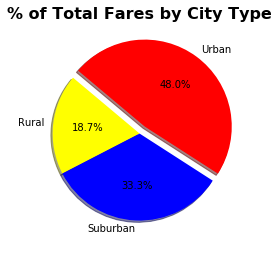

In [36]:
colors = ["yellow", "blue", "red"]
explode = (0, 0, 0.1)

plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type", fontsize=16, fontweight="bold")
plt.savefig("Images/% of Total Fares by City Type.png")
plt.show()

## Total Fares by City Type

In [37]:
# Calculate Type Percents
fare_urban = urban["fare"].sum()
fare_suburban = suburban["fare"].sum()
fare_rural = rural["fare"].sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]

sizes = [fare_urban, fare_suburban, fare_rural]

colors = ["lightcoral", "lightblue", "yellow"]

#explode = (.1,0,0)

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Totalfare.png")

NameError: name 'urban' is not defined

In [38]:
# Show Figure
plt.show()

## Total Rides by City Type

In [39]:
# Calculate Ride Percents
pie_rides_urban = urban['city'].count()
pie_rides_suburban = suburban['city'].count()
pie_rides_rural = rural['city'].count()

# Build Pie Chart
sizes_2 = [pie_rides_urban, pie_rides_suburban, pie_rides_rural]

plt.pie(sizes_2, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("TotalRides")


NameError: name 'urban' is not defined

In [40]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [41]:
# Calculate Driver Percents
pie_drivers_urban = (city_urban['driver_count'].sum() / city_urban['city'].count()).sum()
pie_drivers_rural = (city_rural['driver_count'].sum() / city_rural['city'].count()).sum()
pie_drivers_suburban = (city_suburban['driver_count'].sum() / city_suburban['city'].count()).sum()

# Build Pie Charts
sizes_3 = [pie_drivers_urban, pie_drivers_suburban, pie_drivers_rural]

plt.pie(sizes_3, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Number of total drivers by City Type")

# Save Figure
plt.savefig("TotalDrivers")
plt.show()

NameError: name 'city_urban' is not defined

In [42]:
# Show Figure
plt.show()